In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
%matplotlib inline

In [71]:
# seaborn customPalette setup
colors = ['#474b2a','#7b6732','#a87830','#97c17c','#2c8cc9']
customPalette = sns.set_palette(sns.color_palette(colors))

# IMPORT DATASETS

IMDB,TM,TN

In [2]:
# connect IMDB
con =sqlite3.connect('zippedData/im.db')

In [3]:
# IMDB READ

df_IMDB = pd.read_sql("""
SELECT b.primary_title AS title,b.genres AS genres,r.averagerating AS ratings,r.numvotes AS votes,b.start_year
FROM movie_ratings AS r
LEFT JOIN movie_basics AS b
ON r.movie_id = b.movie_id
ORDER BY ratings DESC
""",con)
df_IMDB.head()

,title,genres,ratings,votes,start_year
0,The Paternal Bond: Barbary Macaques,Documentary,10.0,5,2015
1,Requiem voor een Boom,Documentary,10.0,5,2016
2,Freeing Bernie Baran,"Crime,Documentary",10.0,5,2010
3,Hercule contre Hermès,Documentary,10.0,5,2012
4,Pick It Up! - Ska in the '90s,Documentary,10.0,5,2019


In [4]:
df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv')
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
df_TM = pd.read_csv('zippedData/tmdb.movies.csv')
df_TM

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


# COMBINE DATASETS

df <br>
IMDB + TN + TM <br>
2000+ movies

dfl <br>
(df LARGE) <br>
IMDB + TM <br>
23000+ movies

In [6]:
df = pd.merge(df_IMDB,df_TM,how='inner',left_on='title',right_on='title')

In [7]:
df = df.drop_duplicates()

In [8]:
df = df.merge(df_tn,left_on='title',right_on='movie')

In [9]:
df = df.drop_duplicates(subset='title')

In [10]:
df.sample(5)

,title,genres,ratings,votes,start_year,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
357,The Return,Adventure,8.2,32,2015,20175,[99],390311,en,The Return,0.600,2016-04-17,7.0,2,43,"Feb 6, 2004",The Return,"$15,000,000","$501,752","$5,953,886"
2719,Final Destination 5,Horror,5.9,98061,2011,2537,"[27, 9648]",55779,en,Final Destination 5,13.392,2011-08-12,6.0,1701,49,"Aug 12, 2011",Final Destination 5,"$40,000,000","$42,587,643","$155,011,165"
3008,The Boss,Comedy,5.4,39096,2016,17525,[35],323676,en,The Boss,11.442,2016-04-08,5.8,822,17,"Apr 8, 2016",The Boss,"$29,000,000","$63,077,560","$78,652,207"
2623,Get Hard,"Comedy,Crime",6.0,111187,2015,14274,[35],257091,en,Get Hard,12.129,2015-03-27,6.0,1469,97,"Mar 27, 2015",Get Hard,"$40,000,000","$90,411,453","$106,511,453"
2479,The Neon Demon,"Horror,Thriller",6.2,72359,2016,17514,"[53, 27, 9648]",301365,en,The Neon Demon,11.787,2016-06-14,6.6,2005,68,"Jun 24, 2016",The Neon Demon,"$7,500,000","$1,333,124","$3,559,803"


In [11]:
dfl = pd.merge(df_IMDB,df_TM,how='inner',left_on='title',right_on='title')

In [12]:
dfl.sample(5)

,title,genres,ratings,votes,start_year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
8838,Mala Mala,"Biography,Documentary,Drama",6.6,554,2014,12552,"[99, 18]",264164,es,Mala Mala,1.268,2014-04-19,6.7,10
8461,Battle of the Sexes,"Biography,Comedy,Drama",6.7,43245,2017,20771,"[35, 18, 36]",369192,en,Battle of the Sexes,11.988,2017-09-22,6.9,1045
2534,Other People,"Comedy,Drama",6.7,7724,2016,17859,[18],371449,en,Other People,6.690,2016-09-09,6.6,86
14739,No Clue,"Comedy,Crime,Mystery",5.4,821,2013,12334,[35],251990,en,No Clue,1.555,2014-06-17,5.0,9
10970,Morris from America,"Comedy,Drama,Romance",6.2,4691,2016,18153,"[18, 10749]",352890,en,Morris from America,3.869,2016-08-19,6.0,57


# DATA CLEANING

### df data cleaning

In [13]:
df = df[['title','genres','ratings','votes','release_date_x','production_budget','worldwide_gross']]

In [14]:
df = df.dropna()

In [15]:
df.sample(5)

,title,genres,ratings,votes,release_date_x,production_budget,worldwide_gross
1836,Madagascar 3: Europe's Most Wanted,"Adventure,Animation,Comedy",6.8,146858,2012-06-08,"$145,000,000","$746,921,271"
653,Bully,"Drama,Musical",7.9,9,2011-04-23,"$2,100,000","$1,381,824"
3038,Incarnate,"Horror,Thriller",5.3,10217,2016-12-02,"$5,000,000","$9,371,036"
2939,What Women Want,"Comedy,Romance,Sci-Fi",5.6,1152,2011-02-04,"$65,000,000","$374,105,123"
2997,Gods of Egypt,"Action,Adventure,Fantasy",5.4,95111,2016-02-26,"$140,000,000","$138,836,756"


In [16]:
df['genres'] = df['genres'].apply(lambda x: x.split(','))

In [17]:
df

,title,genres,ratings,votes,release_date_x,production_budget,worldwide_gross
0,Crossroads,[Documentary],9.3,22,2017-10-14,"$12,000,000","$57,000,000"
12,The Runaways,[Adventure],9.2,47,2010-03-19,"$9,500,000","$5,278,632"
14,The Wall,[Documentary],9.2,8,2013-06-07,"$3,000,000","$4,495,262"
22,Survivor,"[Biography, Crime, Documentary]",9.0,45,2012-08-29,"$20,000,000","$1,703,281"
28,Frankenstein,[Drama],9.0,1832,2015-08-15,"$45,000,000","$112,006,296"
...,...,...,...,...,...,...,...
3356,Red River,[Horror],2.3,179,2011-05-05,"$3,000,000","$9,012,000"
3357,Snow White: A Deadly Summer,[Horror],2.2,679,2012-03-16,"$1,000,000",$0
3358,United Passions,"[Drama, History, Sport]",2.1,3878,2015-06-05,"$30,000,000","$168,832"
3359,Foodfight!,"[Action, Animation, Comedy]",1.9,8248,2013-05-07,"$45,000,000","$73,706"


In [18]:
df['genres'] = df['genres'].map(lambda x: random.choice(x))

In [19]:
objects_to_floats = ['production_budget','worldwide_gross']

for x in objects_to_floats:
    df[x] = df[x].str.replace('$',"")
    df[x] = df[x].str.replace(',',"")

In [20]:
df['genres'] = df['genres'].astype('category')

In [21]:
df['production_budget'] = df['production_budget'].astype('float')

In [22]:
# turn the budget to million
df['production_budget'] = df['production_budget']/1000000

In [23]:
df.rename(columns = {'production_budget':'production_budget_million'}, inplace = True)

In [24]:
df

,title,genres,ratings,votes,release_date_x,production_budget_million,worldwide_gross
0,Crossroads,Documentary,9.3,22,2017-10-14,12.0,57000000
12,The Runaways,Adventure,9.2,47,2010-03-19,9.5,5278632
14,The Wall,Documentary,9.2,8,2013-06-07,3.0,4495262
22,Survivor,Documentary,9.0,45,2012-08-29,20.0,1703281
28,Frankenstein,Drama,9.0,1832,2015-08-15,45.0,112006296
...,...,...,...,...,...,...,...
3356,Red River,Horror,2.3,179,2011-05-05,3.0,9012000
3357,Snow White: A Deadly Summer,Horror,2.2,679,2012-03-16,1.0,0
3358,United Passions,Sport,2.1,3878,2015-06-05,30.0,168832
3359,Foodfight!,Comedy,1.9,8248,2013-05-07,45.0,73706


In [25]:
df['worldwide_gross'] = df['worldwide_gross'].astype('float')

In [26]:
df['release_date_x'] = pd.to_datetime(df['release_date_x'] )

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 3360
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   title                      1775 non-null   object        
 1   genres                     1775 non-null   category      
 2   ratings                    1775 non-null   float64       
 3   votes                      1775 non-null   int64         
 4   release_date_x             1775 non-null   datetime64[ns]
 5   production_budget_million  1775 non-null   float64       
 6   worldwide_gross            1775 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 99.6+ KB


### dfl data cleaning

In [28]:
dfl = dfl.drop_duplicates()

In [29]:
dfl = dfl.dropna()

In [30]:
dfl = dfl[['title','genres','ratings','votes','release_date']]

In [31]:
dfl['genres'] = dfl['genres'].apply(lambda x: x.split(','))

In [32]:
dfl['genres'] = dfl['genres'].map(lambda x: random.choice(x))

In [33]:
dfl = dfl.drop_duplicates()

In [34]:
dfl['release_date'] = pd.to_datetime(dfl['release_date'] )

In [35]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19260 entries, 0 to 19948
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         19260 non-null  object        
 1   genres        19260 non-null  object        
 2   ratings       19260 non-null  float64       
 3   votes         19260 non-null  int64         
 4   release_date  19260 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 902.8+ KB


In [36]:
dfl.head()

,title,genres,ratings,votes,release_date
0,A Mediocre Documentary with Tom And Dan,Documentary,9.8,5,2018-05-03
1,Love on a Leash,Family,9.7,25,2013-08-13
3,Finger of God 2,Documentary,9.5,8,2018-12-04
4,"Hare Krishna! The Mantra, the Movement and the...",Documentary,9.5,829,2017-06-16
5,From the Ground Up,Documentary,9.4,53,2017-12-08


# DATA FILTER

In [77]:
df = df[(df['release_date_x'] >= '2010-01-01') & (df['release_date_x'] <= '2018-12-31')]

In [78]:
dfl = dfl[(dfl['release_date'] >= '2010-01-01') & (dfl['release_date'] <= '2018-12-31')]

In [47]:
dfl_genre_counts = dfl.groupby(by='genres')['genres'].count().sort_values(ascending=False).to_frame()

In [112]:
dfl_ratings = dfl[['genres','ratings']]

# TIME TO PLOT!

### df

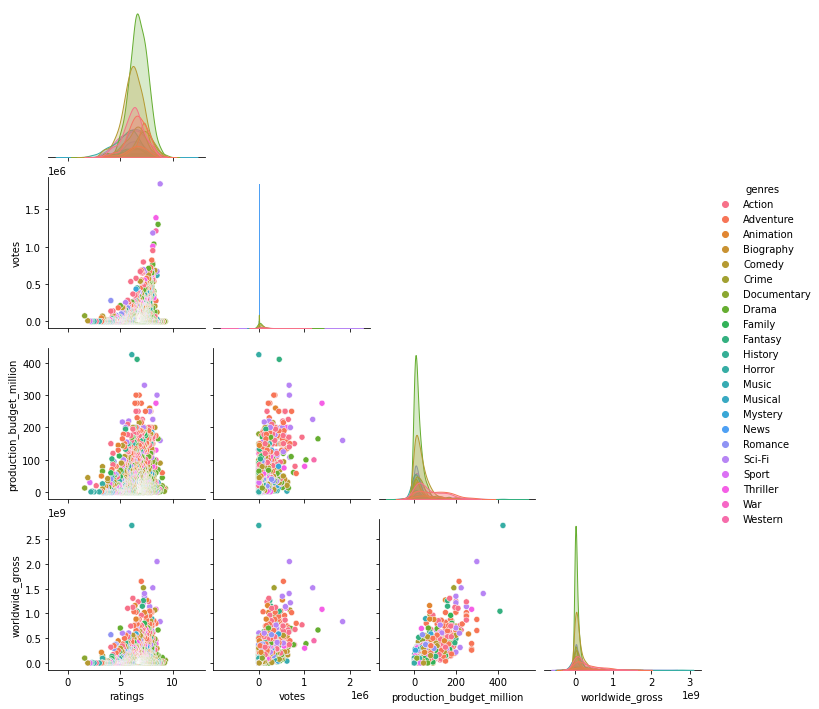

In [75]:
sns.pairplot(df, hue = 'genres', corner = True,palette=customPalette)

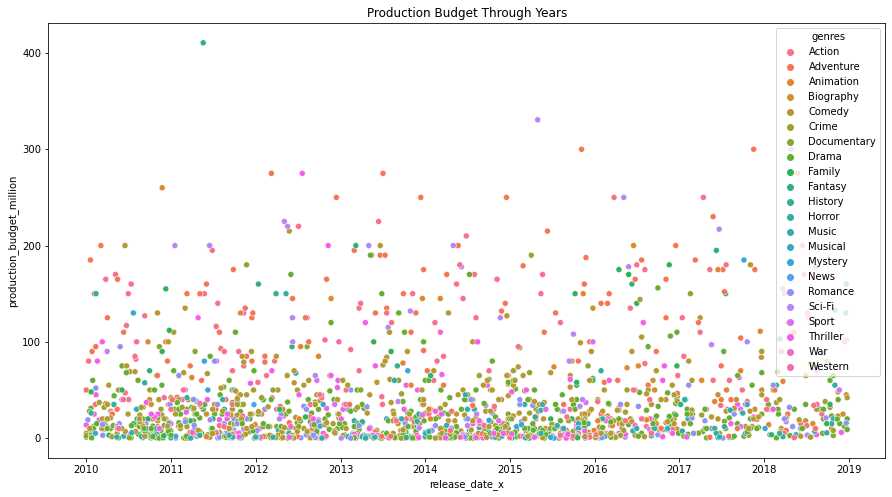

In [84]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'release_date_x', y = 'production_budget_million', hue = 'genres', data = df, ax = ax, palette=customPalette)
ax.set_title('Production Budget Through Years');

# no trend?

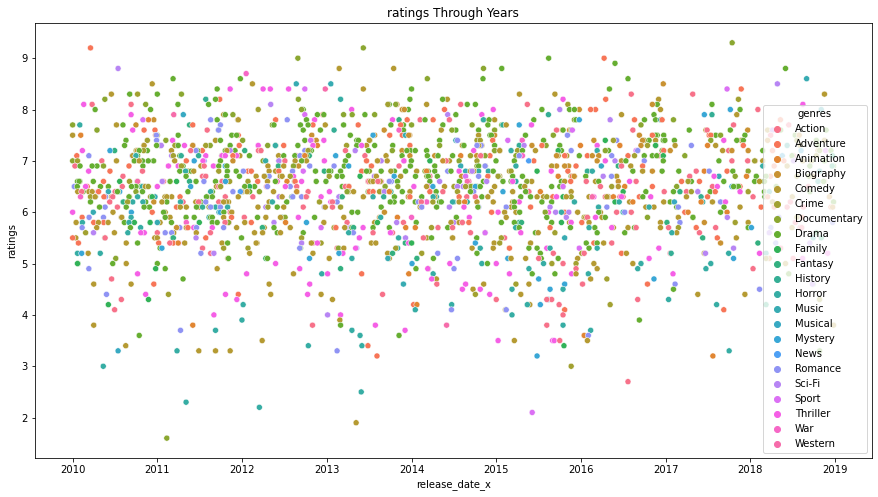

In [119]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'release_date_x', y = 'ratings', hue = 'genres', data = df, ax = ax, palette=customPalette)
ax.set_title('ratings Through Years');

# no trend?

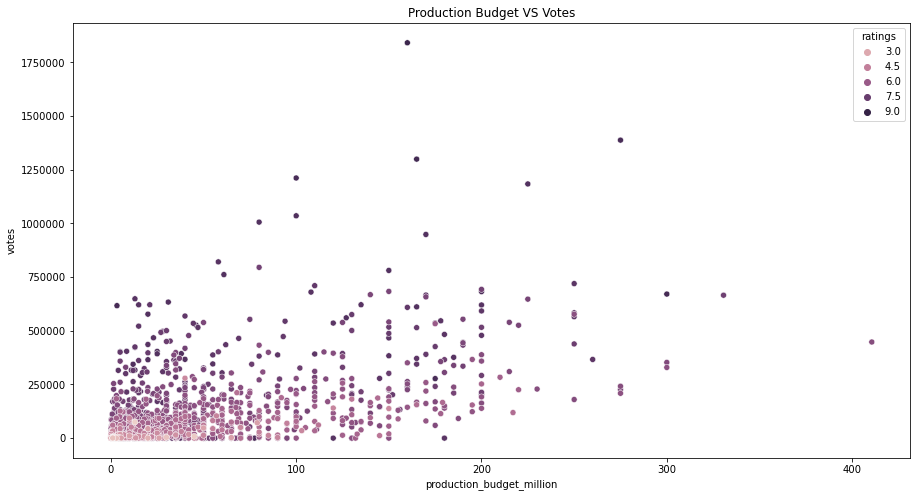

In [83]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'production_budget_million', y = 'votes', hue = 'ratings', data = df, ax = ax, palette=customPalette)
ax.set_title('Production Budget VS Votes')
ax.ticklabel_format(useOffset=False,style='plain');

### dfl

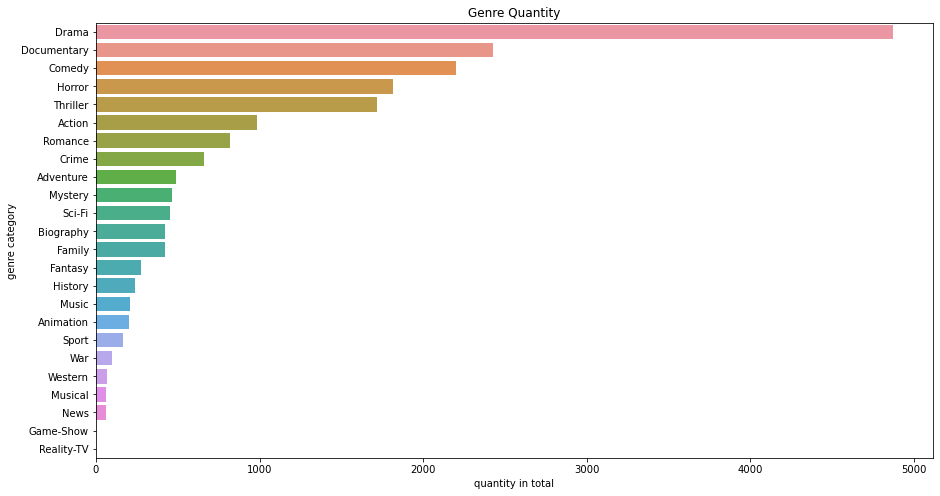

In [70]:
fig,ax = plt.subplots(figsize=(15,8))

sns.barplot(y = dfl_genre_counts.index, x = 'genres', data = dfl_genre_counts, ax = ax, palette = customPalette)
ax.set_title('Genre Quantity')
ax.set_xlabel('quantity in total')
ax.set_ylabel('genre category');

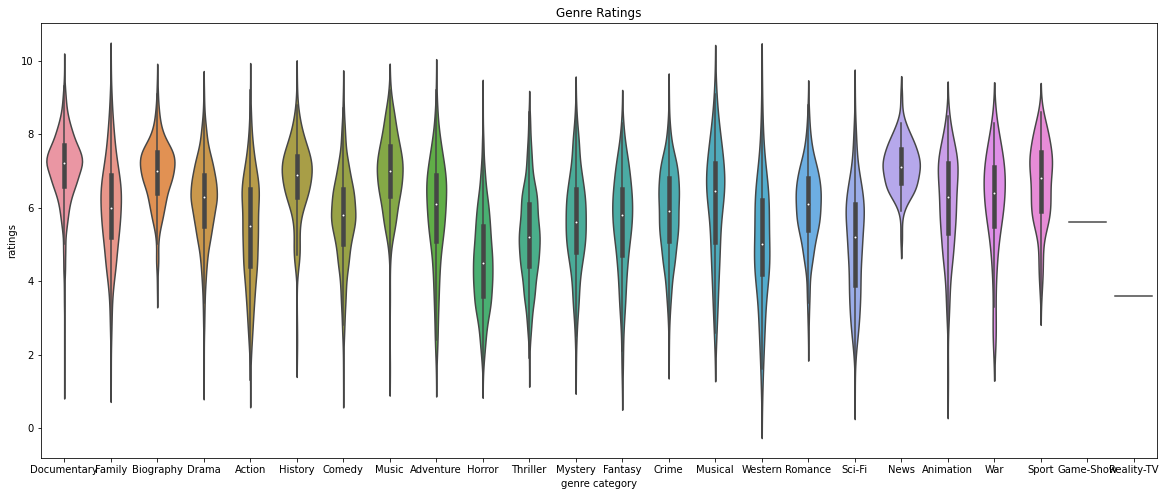

In [114]:
fig,ax = plt.subplots(figsize=(20,8))

sns.violinplot(y = 'ratings', x = 'genres', data = dfl_ratings, ax = ax, palette = customPalette)
ax.set_title('Genre Ratings')
ax.set_xlabel('genre category')
ax.set_ylabel('ratings');

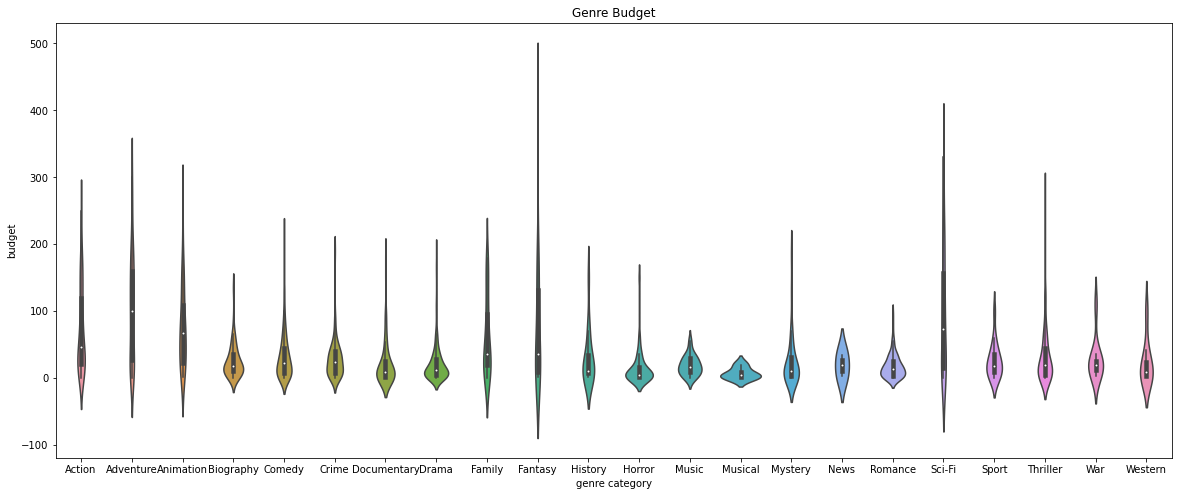

In [116]:
fig,ax = plt.subplots(figsize=(20,8))

sns.violinplot(y = 'production_budget_million', x = 'genres', data = df, ax = ax, palette = customPalette)
ax.set_title('Genre Budget')
ax.set_xlabel('genre category')
ax.set_ylabel('budget');

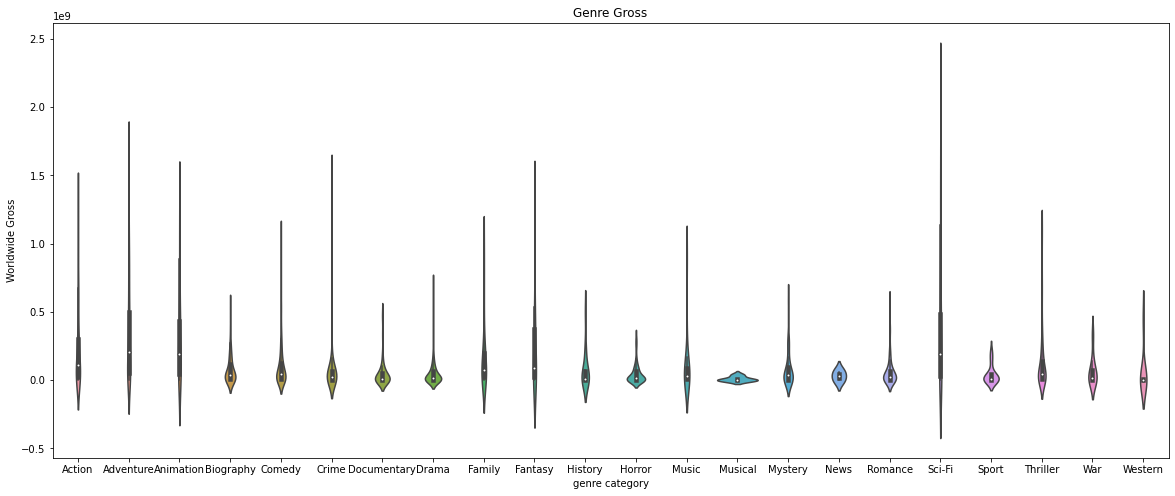

In [118]:
fig,ax = plt.subplots(figsize=(20,8))

sns.violinplot(y = 'worldwide_gross', x = 'genres', data = df, ax = ax, palette = customPalette)
ax.set_title('Genre Gross')
ax.set_xlabel('genre category')
ax.set_ylabel('Worldwide Gross');